In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
1-(.95)**10

0.4012630607616213

## Percentiles

In [3]:
v = [1, 7, 3, 9, 5]
v

[1, 7, 3, 9, 5]

In [4]:
v = [1, 7, 3, 9, 5]
percentile(20, v)

1

* A) 1
* B) 3
* C) 5
* D) 7
* E) 0

In [5]:
v = [1, 7, 3, 9, 5]
percentile(10, v)

1

* A) 1
* B) 3
* C) 5
* D) 7
* E) 0

In [6]:
v = [1, 7, 3, 9, 5]
percentile(50, v)

5

* A) 1
* B) 3
* C) 5
* D) 7
* E) 9

In [7]:
v = [1, 7, 3, 9, 5]
percentile(39, v) == percentile(40, v)

True

* A) True
* B) False

In [8]:
v = [1, 7, 3, 9, 5]
percentile(40, v) == percentile(41, v)

False

* A) True
* B) False

In [9]:
v = [1, 7, 3, 9, 5]
percentile(40, v)

3

In [10]:
Table(['Percent', 'Percentile']).with_rows([
   [ 1, percentile( 1, v)], 
   [10, percentile(10, v)], 
   [20, percentile(20, v)], 
   [39, percentile(39, v)], 
   [40, percentile(40, v)], 
   [41, percentile(41, v)], 
   [50, percentile(50, v)], 
])

Percent,Percentile
1,1
10,1
20,1
39,3
40,3
41,5
50,5


In [15]:
percentile(50,[1,2,4,6])

2

## Estimation

In [16]:
sf = Table.read_table('san_francisco_2015.csv').select(3, 11, 21)
sf.set_format('Total Compensation', NumberFormatter(0))
sf = sf.where('Total Compensation', are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


In [17]:
sf.sort('Total Compensation')

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Public Service Trainee,"10,002"
Community Health,Special Nurse,"10,003"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,004"
Human Welfare & Neighborhood Development,Public Svc Aide-Public Works,"10,006"
Public Protection,EMT Paramedic,"10,009"
"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng","10,010"
Human Welfare & Neighborhood Development,Public Service Trainee,"10,010"
General Administration & Finance,Communications Systems Tech,"10,014"
Community Health,Patient Care Assistant,"10,015"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,017"


In [18]:
sf.sort('Total Compensation', descending=True)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,"648,875"
General Administration & Finance,Asst Med Examiner,"480,509"
General Administration & Finance,Asst Med Examiner,"427,219"
"Public Works, Transportation & Commerce",Dept Head V,"426,686"
Community Health,"Adm, SFGH Medical Center","422,800"
Public Protection,"Chief, Fire Department","418,844"
"Public Works, Transportation & Commerce",Executive Contract Employee,"417,848"
Community Health,Senior Physician Specialist,"415,457"
Public Protection,Chief Of Police,"414,791"
"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept","405,050"


In [19]:
sf.where("Job", "Mayor")

Organization Group,Job,Total Compensation
General Administration & Finance,Mayor,"379,798"


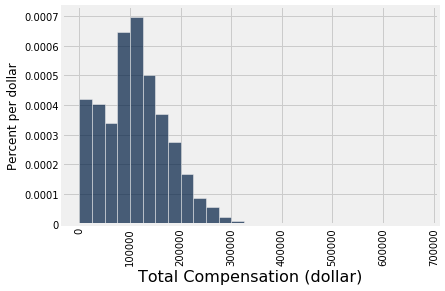

In [20]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=comp_bins, unit='dollar')

In [21]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Manager II,"158,754"
"Public Works, Transportation & Commerce",Project Manager 2,"104,104"
"Public Works, Transportation & Commerce",Manager V,"88,189"


In [22]:
np.median(sample_from_population.column('Total Compensation'))

108529.20999999999

In [23]:
np.median(sf.column('Total Compensation'))

107219.48

In [24]:
percentile(50, sample_from_population.column('Total Compensation'))

107767.92

## Sample variability

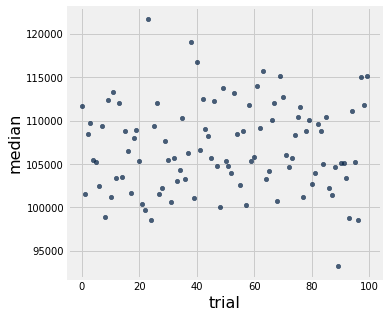

In [25]:
medians = make_array()
repetitions = np.arange(100)
for i in repetitions:
    sample = sf.sample(200, with_replacement=False)
    median = np.median(sample.column('Total Compensation'))
    medians = np.append(medians, median)

Table().with_columns('trial', repetitions, 'median', medians).scatter('trial')

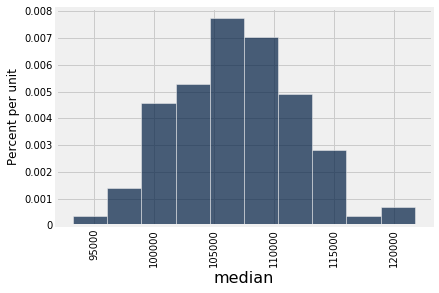

In [26]:
Table().with_columns('median', medians).hist()

In [27]:
percentile(2.5, medians)

98563.28

In [28]:
percentile(97.5, medians)

116718.12

In [29]:
print("95% of sample medians were between", 
      percentile(2.5, medians),
      "and",
      percentile(97.5, medians))

95% of sample medians were between 98563.28 and 116718.12


## Bootstrap

In [30]:
sample_from_population # From now on, this is all we have.

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Manager II,"158,754"
"Public Works, Transportation & Commerce",Project Manager 2,"104,104"
"Public Works, Transportation & Commerce",Manager V,"88,189"
General Administration & Finance,Attorney (Civil/Criminal),"250,816"
"Public Works, Transportation & Commerce",IS Business Analyst-Principal,"74,266"
"Public Works, Transportation & Commerce",Transit Operator,"55,439"
Human Welfare & Neighborhood Development,Employment & Training Spec 1,"47,584"
Culture & Recreation,Curator 1,"95,266"
Public Protection,"Lieutenant, Fire Suppression","206,377"
Community Health,Nurse Practitioner,"146,358"


In [31]:
sam_median = np.median(sample_from_population.column('Total Compensation'))
sam_median

108529.20999999999

In [32]:
resample_1 = sample_from_population.sample()
resample_1.sort("Total Compensation")

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Transit Operator,"10,625"
"Public Works, Transportation & Commerce",PS Aide To Prof,"11,230"
Public Protection,"Counselor, Juvenile Hall SFERS","12,140"
General Administration & Finance,Senior Account Clerk,"12,965"
"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng","14,655"
Culture & Recreation,Custodian,"14,842"
Culture & Recreation,Custodian,"14,842"
Human Welfare & Neighborhood Development,Publ Svc Aide-Asst To Prof,"15,430"
"Public Works, Transportation & Commerce",Stdntdsgn Train2/Arch/Eng/Plng,"15,883"
General Administration & Finance,Custodian,"17,155"


In [33]:
np.median(resample_1.column('Total Compensation'))

107155.49

In [34]:
resample_2 = sample_from_population.sample()
np.median(resample_2.column('Total Compensation'))

108529.20999999999

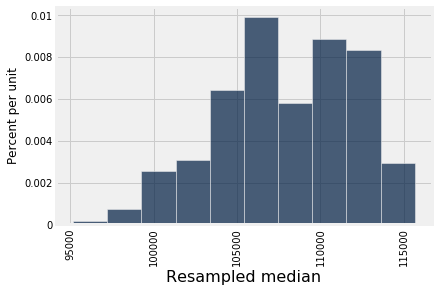

In [35]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('Total Compensation'))
    resampled_medians = np.append(resampled_medians, median)
    
Table().with_column('Resampled median', resampled_medians).hist()

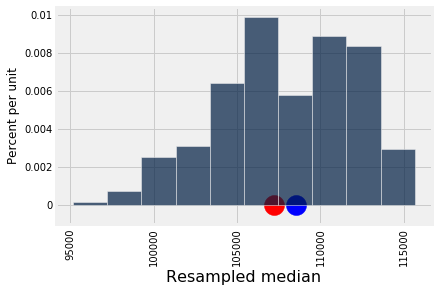

In [36]:
Table().with_column('Resampled median', resampled_medians).hist()
# True population median
pop_median = np.median(sf.column("Total Compensation"))
sam_median = np.median(sample_from_population.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)
plots.scatter(sam_median, 0, color='blue', s=400)


## Confidence Intervals

In [37]:
print("95% of resampled medians were between", 
      percentile(2.5, resampled_medians),
      "and",
      percentile(97.5, resampled_medians))

95% of resampled medians were between 99562.515 and 114704.095


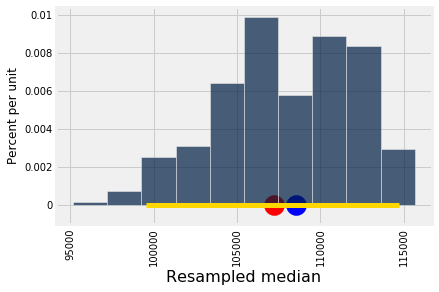

In [38]:
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist(0)
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column('Total Compensation'))
sam_median = np.median(sample_from_population.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)
plots.scatter(sam_median, 0, color='blue', s=400)


In [39]:
sample_from_population = sf.sample(200)
median_of_sample = np.median(sample_from_population.column('Total Compensation'))
print('Sample median:', median_of_sample)

Sample median: 110808.325


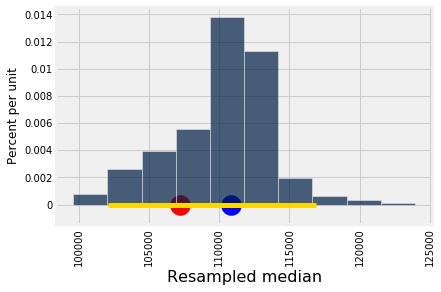

In [40]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('Total Compensation'))
    resampled_medians = np.append(resampled_medians, median)
    
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column('Total Compensation'))
sam_median = np.median(sample_from_population.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)
plots.scatter(sam_median, 0, color='blue', s=400)


In [41]:
# This simulation takes several minutes

intervals = Table(['Lower', 'Upper'])

for j in np.arange(100):
    sample_from_population = sf.sample(200)
    resampled_medians = make_array()
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = np.median(resample.column('Total Compensation'))
        resampled_medians = np.append(resampled_medians, median)

    interval_95 = [percentile(2.5, resampled_medians),
                   percentile(97.5, resampled_medians)]

    intervals.append(interval_95)
    print('trial number', j, 'of 100')

trial number 0 of 100
trial number 1 of 100
trial number 2 of 100
trial number 3 of 100
trial number 4 of 100
trial number 5 of 100
trial number 6 of 100
trial number 7 of 100
trial number 8 of 100
trial number 9 of 100
trial number 10 of 100
trial number 11 of 100
trial number 12 of 100
trial number 13 of 100
trial number 14 of 100
trial number 15 of 100
trial number 16 of 100
trial number 17 of 100
trial number 18 of 100
trial number 19 of 100
trial number 20 of 100
trial number 21 of 100
trial number 22 of 100
trial number 23 of 100
trial number 24 of 100
trial number 25 of 100
trial number 26 of 100
trial number 27 of 100
trial number 28 of 100
trial number 29 of 100
trial number 30 of 100
trial number 31 of 100
trial number 32 of 100
trial number 33 of 100
trial number 34 of 100
trial number 35 of 100
trial number 36 of 100
trial number 37 of 100
trial number 38 of 100
trial number 39 of 100
trial number 40 of 100
trial number 41 of 100
trial number 42 of 100
trial number 43 of 10

In [42]:
intervals

Lower,Upper
88200.5,107164
90687,109405
96643.6,118680
91349.1,109299
91624.6,114157
96418.7,120216
98503.7,120649
98246.3,113501
92568.4,113923
99929,117470


In [43]:
truth = np.median(sf.column('Total Compensation'))
correct = intervals.where('Lower', are.not_above(truth)).where('Upper', are.not_below(truth))
correct.num_rows

93